## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [34]:
# Run these commands in terminal:
# pip install catboost
# pip install xgboost

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modeling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/SCMS_Delivery_History_Dataset.csv')

#### Show Top 5 Records

In [3]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


## OVERVIEW OF DATA

In [4]:
print('Total number of rows: ',df.shape[0])
print('Total number of column :',df.shape[1])
df.dtypes

Total number of rows:  10324
Total number of column : 33


ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


## DATA CLEAN

In [5]:
df=df[df['First Line Designation']!='No']
df=df[df['Weight (Kilograms)']!='Weight Captured Separately']
df=df[df['Freight Cost (USD)']!='Freight Included in Commodity Cost']
df=df[df['Freight Cost (USD)']!='Invoiced Separately']
df=df[df['Freight Cost (USD)']!='Freight Included in Commodity Cost']

df=df.dropna(subset=['Line Item Insurance (USD)'])
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
19,92,102-NG-T01,Pre-PQ Process,SCMS-592,ASN-485,Nigeria,PMO - US,Direct Drop,EXW,Air,...,100,1000,80000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,341,2682.47,128.00
22,115,108-VN-T01,Pre-PQ Process,SCMS-753,ASN-781,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,1920.0,1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07
23,116,108-VN-T01,Pre-PQ Process,SCMS-759,ASN-632,Vietnam,PMO - US,Direct Drop,FCA,Air,...,120,500,41095.0,82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117,1767.38,65.75
24,130,100-HT-T01,Pre-PQ Process,SCMS-10080,ASN-628,Haiti,PMO - US,Direct Drop,EXW,Air,...,100,750,53992.5,71.99,0.72,Inverness Japan,Yes,171,3518.38,86.39
25,134,100-HT-T01,Pre-PQ Process,SCMS-10130,ASN-616,Haiti,PMO - US,Direct Drop,EXW,Air,...,100,25,8750.0,350.00,3.50,"Pacific Biotech, Thailand",Yes,60,3097.85,14.00


Convert import datas object to numerics

In [6]:
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'])
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'])

df.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [7]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,5992.000000,5992.000000,5992.000000,5.992000e+03,5992.000000,5992.000000,5992.000000,5992.000000,5992.00000
mean,51573.725467,76.333611,21917.236482,1.953564e+05,23.928667,0.756891,3273.743825,11272.019543,296.92088
std,31196.405043,79.540002,43486.860613,3.773931e+05,46.380587,4.110614,7039.340764,15965.589608,553.33782
min,92.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.750000,0.00000
25%,15735.250000,30.000000,1000.000000,1.041875e+04,4.300000,0.090000,216.750000,2181.512500,15.83000
50%,57962.500000,60.000000,4927.000000,5.982163e+04,9.500000,0.160000,1093.500000,6011.310000,90.53500
75%,83228.250000,100.000000,23125.000000,2.267010e+05,27.000000,0.660000,3416.000000,14547.550000,336.57000
max,86815.000000,1000.000000,619999.000000,5.951990e+06,1250.000000,238.650000,154780.000000,289653.200000,7708.44000


## ANALYSIS OF DATA

Creating data for analysis

In [8]:
order=df['PO / SO #'].nunique()
total_order=df['PO / SO #'].count()
duplicate_orders=total_order-order
total_unique_projects=df['Project Code'].nunique()
total_Freight_Cost=df['Freight Cost (USD)'].sum()
total_weight=df['Weight (Kilograms)'].sum()
avg_freight_cost_uniqueorder=total_Freight_Cost/order
avg_weight_uniqueorder=total_weight/order
unique_country=df['Country'].nunique()
unique_shipment_mode=df['Shipment Mode'].nunique()
country_summary=df.groupby(['Shipment Mode','Country','Freight Cost (USD)','Weight (Kilograms)']).sum().reset_index()
country_summary=country_summary[['Shipment Mode','Country','Freight Cost (USD)','Weight (Kilograms)']]
country_summary=df.groupby(['Shipment Mode','Country']).agg({'PO / SO #':'count','Freight Cost (USD)':'sum','Weight (Kilograms)':'sum'}).reset_index()
country_summary['freight_cost_by_order']=country_summary['Freight Cost (USD)']/country_summary['PO / SO #']
top_ten_country_by_freight_cost=df.groupby(['Country'])['Freight Cost (USD)'].sum().nlargest(10).reset_index()
mf_summary=df.groupby(['Manufacturing Site']).agg({'PO / SO #':'count','Freight Cost (USD)':'sum'}).reset_index()

UNNECESSARY DATA REMOVE

In [9]:
# "data." has been changed to ".df"
X=df.drop(['Pack Price','Unit Price','ID','First Line Designation','Manufacturing Site','Dosage Form','Dosage','Brand','Sub Classification','Product Group','Delivery Recorded Date','Delivered to Client Date','Scheduled Delivery Date','PO Sent to Vendor Date','PQ First Sent to Client Date','Shipment Mode','Vendor INCO Term','Fulfill Via','Managed By','Country','ASN/DN #','PO / SO #','PQ #','Project Code'],axis=1)
df_1=X.copy()
Y1=df['Pack Price']
Y2= df['Unit Price']
X.head(10)

,Vendor,Item Description,Molecule/Test Type,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
19,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",100,1000,80000.0,341,2682.47,128.00
22,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,240,1000,1920.0,941,4193.49,3.07
23,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,120,500,41095.0,117,1767.38,65.75
24,"Orgenics, Ltd","HIV 1/2, Determine HIV Kit, without Lancets, 1...","HIV 1/2, Determine HIV Kit, without Lancets",100,750,53992.5,171,3518.38,86.39
25,Orasure Technologies Inc.,"HIV 1/2, OraQuick Advance HIV Rapid Antibody K...","HIV 1/2, OraQuick Advance HIV Rapid Antibody Kit",100,25,8750.0,60,3097.85,14.00
26,"Standard Diagnostics, Inc.","HIV 1/2, Bioline 3.0 Kit, Lancets, Capillary p...","HIV 1/2, Bioline 3.0 Kit, Lancets, Capillary p...",25,10000,200000.0,3335,27869.74,320.00
27,"Standard Diagnostics, Inc.","HIV 1/2, Bioline 3.0 Kit, Lancets, Capillary p...","HIV 1/2, Bioline 3.0 Kit, Lancets, Capillary p...",25,10000,200000.0,3335,28461.10,320.00
28,"Standard Diagnostics, Inc.","HIV 1/2, Bioline 3.0 Kit, Lancets, Capillary p...","HIV 1/2, Bioline 3.0 Kit, Lancets, Capillary p...",25,10000,200000.0,3335,28359.80,320.00
29,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,60,64000,99200.0,4228,12237.61,158.72
30,"CHEMBIO DIAGNOSTIC SYSTEMS, INC.","HIV 1/2, Stat-Pak HIV, Kit, 20 Tests","HIV 1/2, Stat-Pak HIV, Kit",20,10000,270000.0,3263,20885.78,432.00


In [10]:
print("Categories in 'Unit of Measure (Per Pack)' variable:     ",end=" " )
print(df['Unit of Measure (Per Pack)'].unique())

print("Categories in 'Line Item Quantity' variable:     ",end=" " )
print(df['Line Item Quantity'].unique())

print("Categories in 'Line Item Value' variable:     ",end=" " )
print(df['Line Item Value'].unique())

print("Categories in 'Weight (Kilograms)' variable:     ",end=" " )
print(df['Weight (Kilograms)'].unique())

print("Categories in 'Freight Cost (USD)' variable:     ",end=" " )
print(df['Freight Cost (USD)'].unique())

print("Categories in 'Line Item Insurance (USD)' variable:     ",end=" " )
print(df['Line Item Insurance (USD)'].unique())

Categories in 'Unit of Measure (Per Pack)' variable:      [ 100  240  120   25   60   20   30   40  540   12    2  300  336    1
   36  270 1000   24    3  200  180   18   90   84  720   50    5  168
   48  144]
Categories in 'Line Item Quantity' variable:      [ 1000   500   750 ... 47733 28516 16006]
Categories in 'Line Item Value' variable:      [  80000.      1920.     41095.   ...   73467.54   64800.   1304800.  ]
Categories in 'Weight (Kilograms)' variable:      [  341   941   117 ...  1504 15198  1547]
Categories in 'Freight Cost (USD)' variable:      [ 2682.47  4193.49  1767.38 ...  3785.72 26180.    3410.  ]
Categories in 'Line Item Insurance (USD)' variable:      [ 128.      3.07   65.75 ...   76.27 1341.33  115.11]


In [11]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(5992, 292)

## For Pack Price (Y1)

In [14]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y1,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((4793, 292), (1199, 292))

#### Create an Evaluate Function to give all metrics after model Training

In [15]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(), 
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),   
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 8.3631
- Mean Absolute Error: 2.9229
- R2 Score: 0.9698
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.1235
- Mean Absolute Error: 3.2548
- R2 Score: 0.9316


Lasso
Model performance for Training set
- Root Mean Squared Error: 38.8652
- Mean Absolute Error: 13.6269
- R2 Score: 0.3473
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27.8812
- Mean Absolute Error: 13.5777
- R2 Score: 0.4810


Ridge
Model performance for Training set
- Root Mean Squared Error: 9.8133
- Mean Absolute Error: 3.3601
- R2 Score: 0.9584
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.0831
- Mean Absolute Error: 3.6903
- R2 Score: 0.9180


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 14.4393
- Mean Absolute Error: 2.3151
- R2 Score: 0.9099
----------------

### Results

In [18]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.986865
7,CatBoosting Regressor,0.983874
5,Random Forest Regressor,0.958648
0,Linear Regression,0.931575
2,Ridge,0.917990
4,Decision Tree,0.869256
3,K-Neighbors Regressor,0.803585
8,AdaBoost Regressor,0.617465
1,Lasso,0.480997


## Linear Regression

In [19]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 93.16


## Plot y_pred and y_test

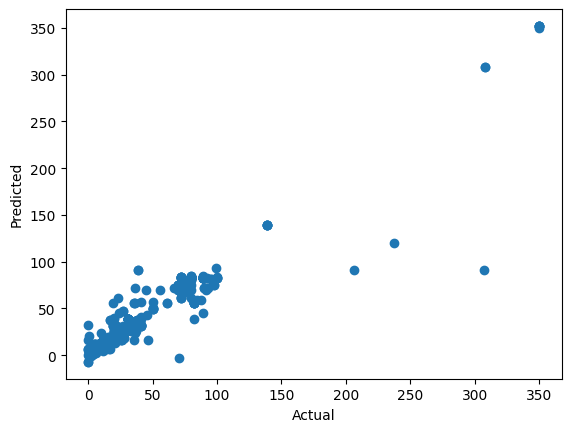

In [20]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

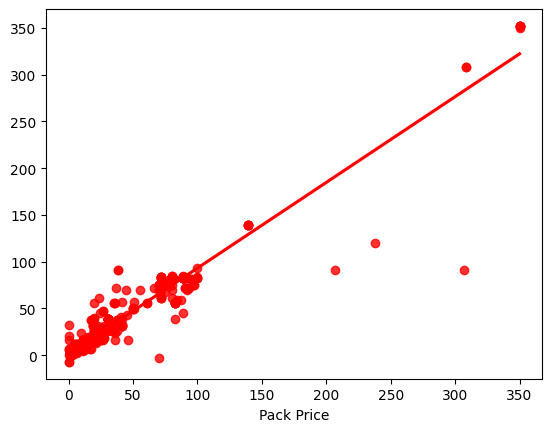

In [21]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [22]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
4175,5.00,11.446095,-6.446095
3439,350.00,351.983487,-1.983487
4342,4.26,6.272046,-2.012046
4358,22.50,20.628378,1.871622
3599,34.30,26.505971,7.794029
...,...,...,...
3083,80.00,83.231508,-3.231508
9442,6.57,5.758075,0.811925
6009,3.57,5.206749,-1.636749
4083,80.00,82.976933,-2.976933


## For Unit Price (Y2)

In [23]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y2_train, y2_test = train_test_split(X,Y2,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((4793, 292), (1199, 292))

#### Create an Evaluate Function to give all metrics after model Training

In [24]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y2_train) # Train model

    # Make predictions
    y2_train_pred = model.predict(X_train)
    y2_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y2_train, y2_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y2_test, y2_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1268
- Mean Absolute Error: 0.0498
- R2 Score: 0.9992
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4561
- Mean Absolute Error: 0.0840
- R2 Score: 0.9686


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.4116
- Mean Absolute Error: 0.9214
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.5750
- Mean Absolute Error: 0.8482
- R2 Score: -0.0007


Ridge
Model performance for Training set
- Root Mean Squared Error: 1.1445
- Mean Absolute Error: 0.0969
- R2 Score: 0.9327
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4933
- Mean Absolute Error: 0.1204
- R2 Score: 0.9633


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2.7427
- Mean Absolute Error: 0.0975
- R2 Score: 0.6135
----------------------

### Results

In [26]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.989299
6,XGBRegressor,0.979568
5,Random Forest Regressor,0.976043
0,Linear Regression,0.968602
4,Decision Tree,0.967854
2,Ridge,0.963272
3,K-Neighbors Regressor,0.926315
8,AdaBoost Regressor,0.925566
1,Lasso,-0.000687


## Linear Regression

In [27]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y2_train)
y2_pred = lin_model.predict(X_test)
score = r2_score(y2_test, y2_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 96.86


## Plot y_pred2 and y_test2

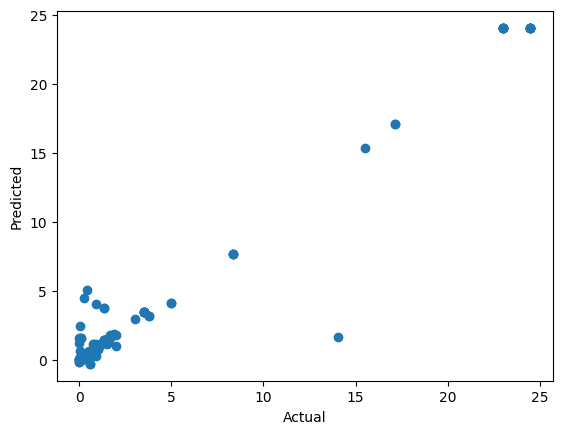

In [28]:
plt.scatter(y2_test,y2_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

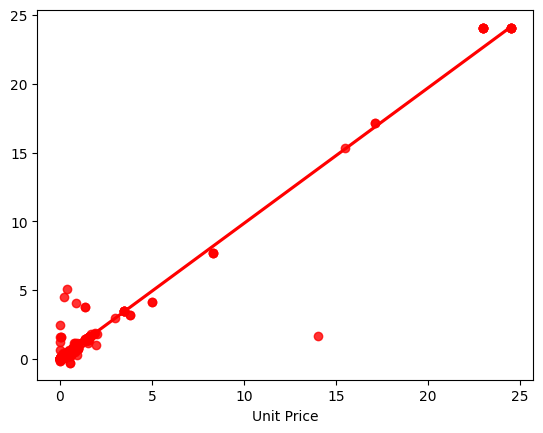

In [29]:
sns.regplot(x=y2_test,y=y2_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [30]:
pred_df=pd.DataFrame({'Actual Value':y2_test,'Predicted Value':y2_pred,'Difference':y2_test-y2_pred})
pred_df

,Actual Value,Predicted Value,Difference
4175,5.00,4.123475,0.876525
3439,3.50,3.519017,-0.019017
4342,0.14,0.201466,-0.061466
4358,0.75,0.688356,0.061644
3599,0.29,0.225207,0.064793
...,...,...,...
3083,0.80,0.838875,-0.038875
9442,0.22,0.220308,-0.000308
6009,0.12,0.176670,-0.056670
4083,0.80,0.846693,-0.046693
